## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

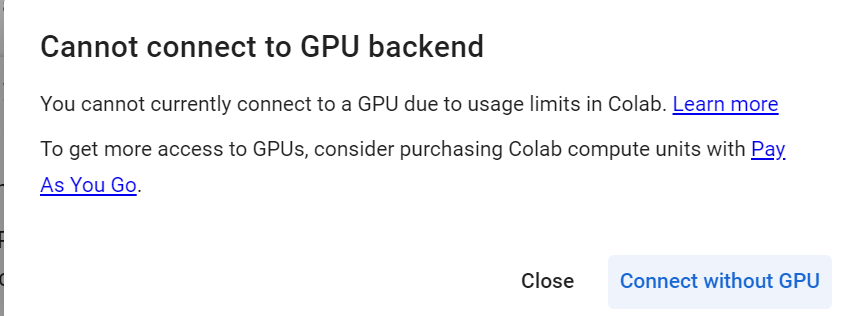

## **Installing and Importing Necessary Libraries**

In [1]:
# installing the libraries for transformers
!pip install -U -q sentence-transformers transformers bitsandbytes accelerate sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.8 MB/s eta 0:00:00


In [44]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# to split the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score, accuracy_score
from sklearn import metrics


# To load/create word embeddings
#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
#from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline


# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:

# loading data into a pandas dataframe
analysis = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/Assignment/stock_news.csv")

## **Data Overview**

In [5]:
# creating a copy of the data
data = analysis.copy()

In [6]:
#Checking the first 5 rows of data
data.head(5)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [7]:
#Checking the first 5 rows of data
data.tail(1)

,Date,News,Open,High,Low,Close,Volume,Label
348,2019-04-30,"In the first quarter, South Korea's Samsung E...",50.764999,50.849998,49.7775,48.70879,186139600,0


In [8]:
# check dataset shape
print('There are',data.shape[0], 'rows and',data.shape[1],'columns in the dataset')

There are 349 rows and 8 columns in the dataset


In [9]:
#Check for any missing values
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


There are no missing values in the dataset





In [10]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

There are no duplicate entries in the dataset

In [11]:
# Mapping dictionary for encoding
encoding_map = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}

# Encode the 'Category' column
data['Label_Encoded'] = data['Label'].map(encoding_map)

In [12]:
# Calculate the difference between Close price and Opening price
data['Price_Change'] = data['Close'] - data['Open']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           349 non-null    object 
 1   News           349 non-null    object 
 2   Open           349 non-null    float64
 3   High           349 non-null    float64
 4   Low            349 non-null    float64
 5   Close          349 non-null    float64
 6   Volume         349 non-null    int64  
 7   Label          349 non-null    int64  
 8   Label_Encoded  349 non-null    object 
 9   Price_Change   349 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.4+ KB


Observations:

Most of the columns are of type numeric either int or float except for News, Date and Label_Encoded

Label is the
target / dependent variable to be predicted


In [14]:
#Exploring the statistical summary:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,349,71,2019-01-03,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
News,349,349,"In the first quarter, South Korea's Samsung E...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,349.0,NaN,NaN,NaN,46.229233,6.442817,37.567501,41.740002,45.974998,50.7075,66.817497
High,349.0,NaN,NaN,NaN,46.700458,6.507321,37.817501,42.244999,46.025002,50.849998,67.0625
Low,349.0,NaN,NaN,NaN,45.745394,6.391976,37.305,41.482498,45.639999,49.7775,65.862503
Close,349.0,NaN,NaN,NaN,44.926317,6.398338,36.254131,40.246914,44.596924,49.11079,64.805229
Volume,349.0,NaN,NaN,NaN,128948236.103152,43170314.918964,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0
Label,349.0,NaN,NaN,NaN,-0.054441,0.715119,-1.0,-1.0,0.0,0.0,1.0
Label_Encoded,349,3,Neutral,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price_Change,349.0,NaN,NaN,NaN,-1.302917,0.556118,-2.687789,-1.672764,-1.334736,-0.885323,0.186356


Statistical Summary Observations-

1) Average Open and Close Price are 46.22 and 44.92 with the mean price change of -1.3

2) Data set spans across 71 dates with 2019-01-13 having highest # of records of 28 entries

3) Neutral has the highest Sentiment polarity in 170 records



## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

In [15]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=False,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
def histogram_violinplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Violinplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=False,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.violinplot(
        data=data, x=feature, ax=ax_box2, color="lightgreen"
    )  # Violinplot will be created
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
data.head(5)

,Date,News,Open,High,Low,Close,Volume,Label,Label_Encoded,Price_Change
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1,Negative,-1.493088
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1,Negative,-1.493088
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1,Negative,-1.493088
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1,Negative,-1.493088
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1,Negative,-1.493088


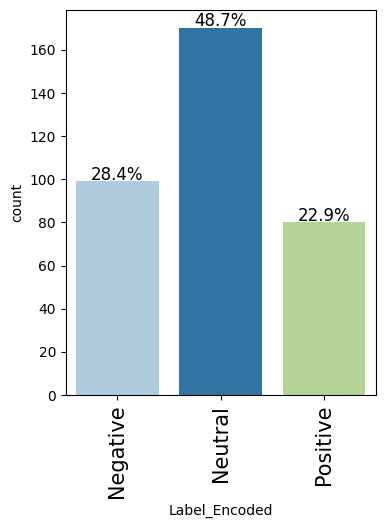

In [19]:
labeled_barplot(data, "Label_Encoded", perc=True)

About 49% of the sentiment polarity is Neutral, while ~28% is Negative and ~23% is positive

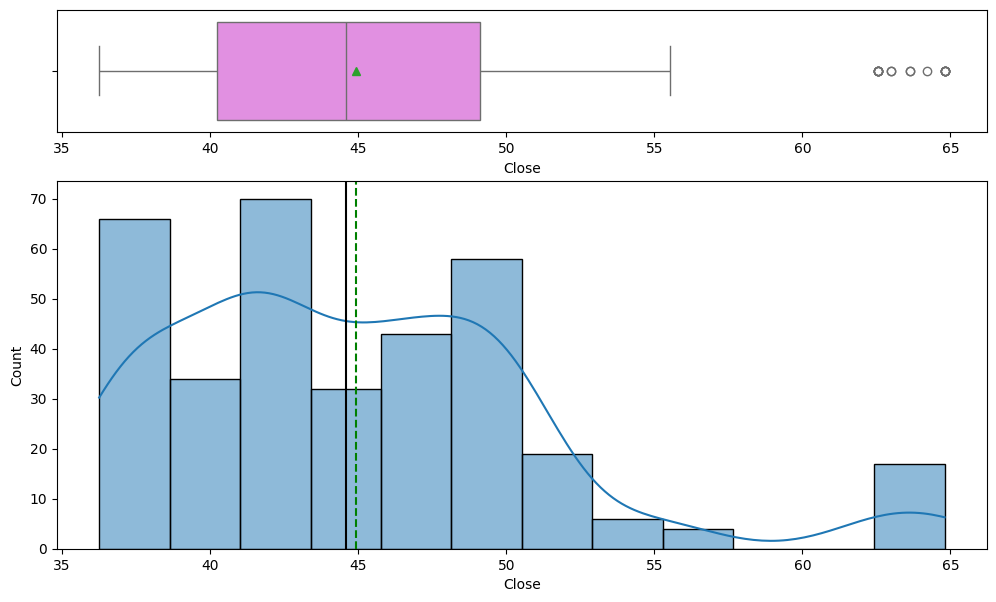

In [20]:
# Analysis on Close Price
histogram_boxplot(data, "Close", kde=True)

The Close price distributions seems to be left skewed and the mean Close price is ~45 and median is ~44.5

Distribution is left skewed and ranges between min 39 and max 64

We see outlier values for > 60 in the distribution

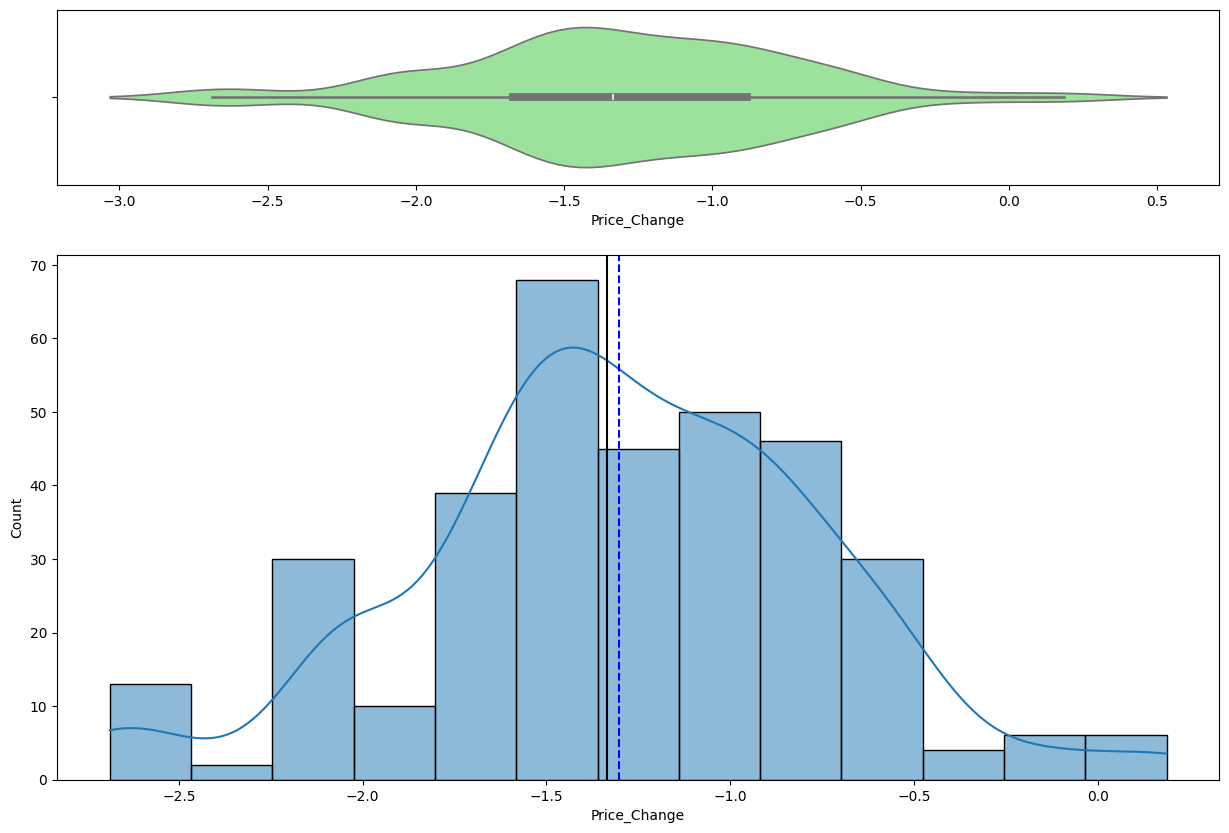

In [21]:
# Analysis on Price difference betwen Close and Open price
histogram_violinplot(data, "Price_Change", kde=True)

The Price change distributions seems to be even with following values:

min ~-2.69

max ~0.18

mean ~-1.3



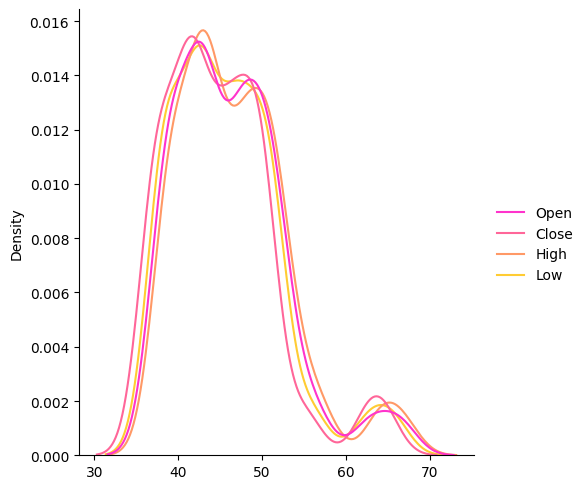

In [22]:
#Plotting Open, Close, High and Low prices in a single distribution plot
cols = ["Open","Close","High","Low"]
sns.displot(data=data[cols], kind="kde", palette="spring");

We see maximum distribution for Open, Close, High and Low prices between the range 40 to 50


### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

In [23]:
# function to plot stacked bar chart with actual values and percentages

def stacked_barplot_with_values(data, predictor, target):
    """
    Print the category counts, percentage and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # find the proportion (%) of personal loans count taken by family size
    cross_tab_prop = pd.crosstab(index=data[predictor],
                             columns=data[target],
                             normalize="index")
    #.sort_values(by=sorter, ascending=False)


    # find the actual count of personal loans taken by family size
    cross_tab = pd.crosstab(index=data[predictor],
                        columns=data[target])
    print(cross_tab)

    #plot the bar graph
    cross_tab_prop.plot(kind='bar',
                        stacked=True,
                        colormap='tab10',
                        figsize=(10, 6))

    plt.legend(loc="lower left", ncol=2)
    plt.xlabel(predictor)
    plt.ylabel(target+" %")

    #iterate through cross tab and cross tab prop for outputting the values in grpah
    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                              cross_tab.loc[x],
                                              cross_tab_prop.loc[x].cumsum()):

            plt.text(x=n - 0.17,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                     color="black",
                     fontsize=12,
                     fontweight="normal")

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### Custom Additional Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

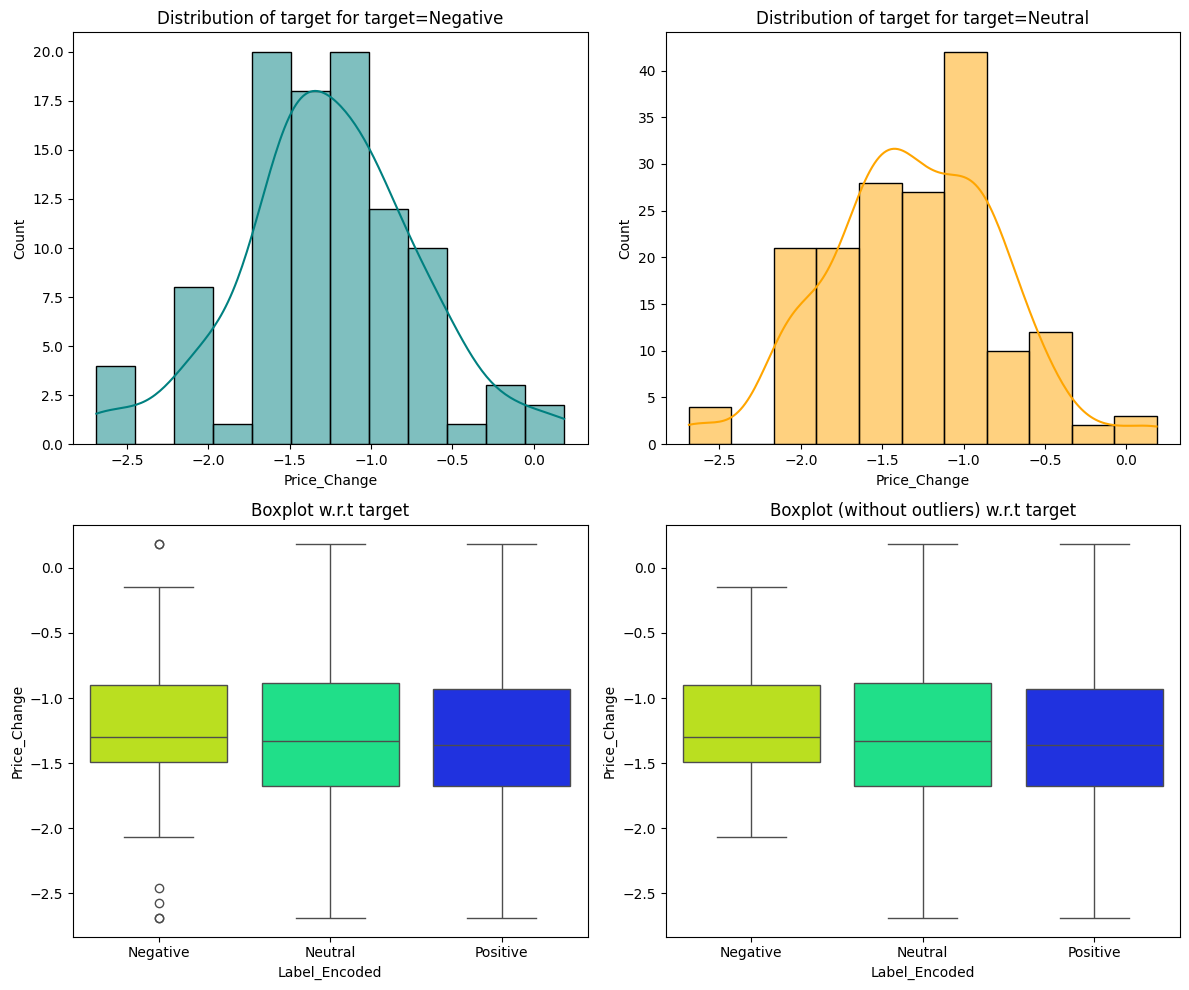

In [26]:
# Analysis on Price Change vs Sentiment Polarity
distribution_plot_wrt_target(data, "Price_Change", "Label_Encoded")

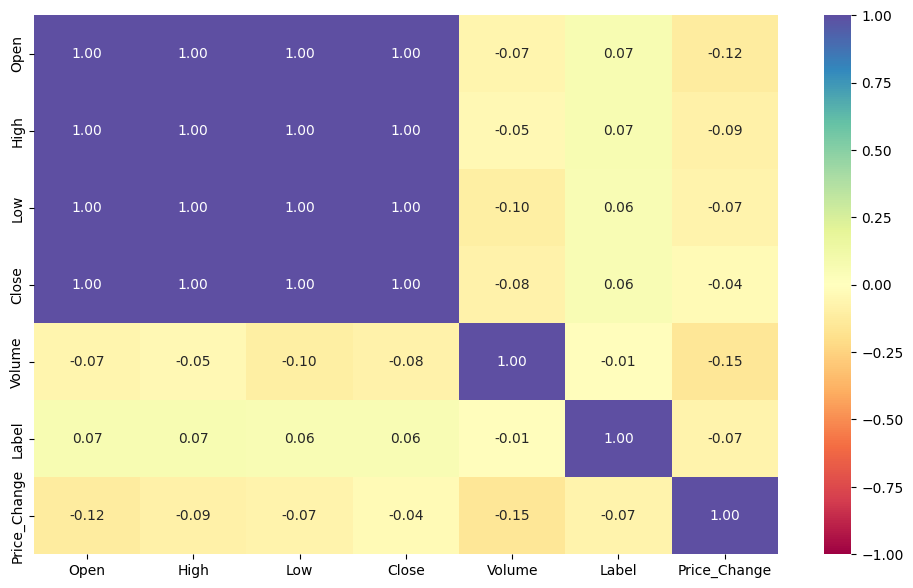

In [27]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Other than expected correlation between Open, High, Low and Close prices, there are no significant correlations between other parameters

## **Data Preprocessing**

In [28]:
analysis["Date"].describe() #Complete the code to print the statistical summary of the 'Date' column

,Date
count,349
unique,71
top,2019-01-03
freq,28


## **Text Preprocessing**

### Removing special characters from the text

In [29]:
# to use regular expressions for manipulating text data
import re

# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [30]:
# Applying the function to remove special characters
data['cleaned_text'] = data['News'].apply(remove_special_characters)

In [31]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,The tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,Apple lowered its fiscal Q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,Apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,This news article reports that yields on long...


### Lowercasing

In [32]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [33]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,this news article reports that yields on long...


### Removing extra whitespace

In [49]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [50]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...
3,This news article reports that yields on long...,this news article reports that yields on long ...


### Removing stopwords

In [54]:
# defining a function to remove stop words using the NLTK library
from nltk.corpus import stopwords
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [55]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [56]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,the tech sector experienced a significant decl...,tech sector experienced significant decline af...
1,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...
2,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...
3,this news article reports that yields on long ...,news article reports yields long dated u treas...


#### Stemmer

In [58]:
# Loading the Porter Stemmer
from nltk.stem import PorterStemmer # Importing PorterStemmer from nltk.stem
ps = PorterStemmer()

In [59]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [60]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [61]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...


## **Word Embeddings**

### SentenceTransformer

## **Sentiment Analysis**

In [ ]:
# defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Reset the index of the DataFrame 'data' before encoding.
data = data.reset_index(drop=True)

# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
embedding_matrix = model.encode(data['News'], device=device, show_progress_bar=True)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
# printing the embedding vector of the first news in the dataset
embedding_matrix[0,:]

array([-2.02310784e-03, -3.67734730e-02,  7.73542970e-02,  4.67134938e-02,
        3.25521491e-02,  2.10234593e-03,  4.32834625e-02,  3.95345055e-02,
        5.82279935e-02,  8.87510832e-03,  7.09636286e-02,  4.99077067e-02,
        6.46608546e-02, -4.97968774e-03, -1.30519150e-02, -2.98355743e-02,
       -8.91324226e-03, -7.82000497e-02, -2.17109416e-02, -5.24823107e-02,
       -5.14276549e-02, -3.30719389e-02, -3.32051702e-02,  4.18126062e-02,
        7.99547732e-02,  1.54092498e-02, -2.15781834e-02,  5.19439504e-02,
       -4.65799347e-02, -3.71371955e-02, -1.04225583e-01,  9.86078829e-02,
        5.21786995e-02,  3.46579067e-02,  1.48810176e-02, -4.47351998e-03,
        5.70117496e-02, -2.41722576e-02,  2.14048922e-02, -6.52144998e-02,
       -3.30644995e-02,  1.61960442e-02, -6.63141757e-02,  4.39943001e-02,
        3.82152870e-02, -4.86519374e-02,  1.62651669e-02, -4.02665585e-02,
       -3.34571279e-03,  3.20955776e-02, -3.91193014e-03, -1.26830293e-02,
        4.49698865e-02,  

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(349, 384)

In [ ]:
X = embedding_matrix
y = data["Label_Encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(261, 384) (88, 384)


In [ ]:
print(y_train.shape, y_test.shape)

(261,) (88,)


### Model Building - Sentence Transformer

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['Negative', 'Neutral', 'Positive']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Building the model with balanced class weights
rf_transformer = RandomForestClassifier(n_estimators = 100, class_weight="balanced", max_depth = 4, min_impurity_decrease=0.01, random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_impurity_decrease=0.01, random_state=42)

In [ ]:
# Predicting on train data
y_pred_train = rf_transformer.predict(X_train)

# Predicting on test data
y_pred_test = rf_transformer.predict(X_test)

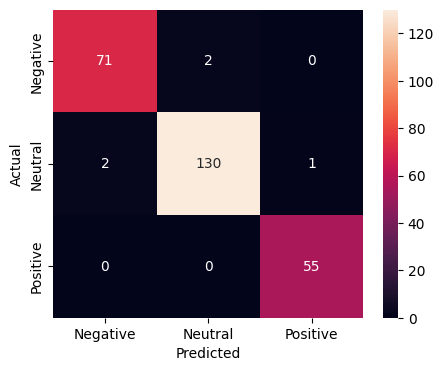

In [ ]:
#Train Data
plot_confusion_matrix(y_train, y_pred_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97        73
     Neutral       0.98      0.98      0.98       133
    Positive       0.98      1.00      0.99        55

    accuracy                           0.98       261
   macro avg       0.98      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261



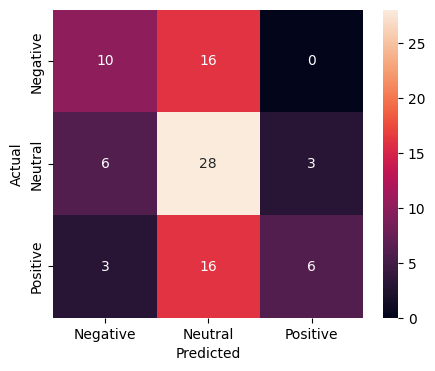

In [ ]:
# Test Data
plot_confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    Negative       0.53      0.38      0.44        26
     Neutral       0.47      0.76      0.58        37
    Positive       0.67      0.24      0.35        25

    accuracy                           0.50        88
   macro avg       0.55      0.46      0.46        88
weighted avg       0.54      0.50      0.47        88



While we see the Randomforest model overfits with the trainig data it doesnt perform well with the test data

Model requires fine tuning with hyper parmaeters to fir the testing data well

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 53.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 191.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 156.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 216.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 154.1 MB/s eta 0:00:00


In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 11.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.51.3 requires huggingface-hub<1.0,>=0.30.0, but you have huggingface-hub 0.20.3 which is incompatible.
peft 0.15.2 requires huggingface_hub>=0.25.0, but you have huggingface-hub 0.20.3 which is incompatible.
accelerate 1.6.0 requires huggingface-hub>=0.21.0, but you have huggingface-hub 0.20.3 which is incompatible.
diffusers 0.33.1 requires huggingface-hub>=0.27.0, but you have huggingface-hub 0.20.3 which is incompatible.


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# loading data into a pandas dataframe
analysis_1 = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/Assignment/stock_news.csv")

In [ ]:
# creating a copy of the data
data_1 = analysis_1.copy()

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2,  # CPU cores
    n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    # n_gpu_layers=43,  # uncomment and change this value based on GPU VRAM pool.
    n_ctx=4200,  # Context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

#### Aggregating the data weekly

In [ ]:
data_1["Date"] = pd.to_datetime(data_1['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data_1.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_llama = weekly_grouped.copy()

In [ ]:
data_llama.head()

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...


#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

In [ ]:
instruction = """You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic."""

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [63]:
data_llama['model_response'] = data_llama['News'].apply(lambda x: generate_llama_response(instruction, x))

NameError: name 'data_llama' is not defined

##### Checking the model output on the weekly data

In [ ]:
data_llama['model_response'].head()

NameError: name 'data_1' is not defined

##### Formatting the model output

## **Conclusions and Recommendations**

-- We used an LLM to do multiple tasks, one stage at a time
    1. We first identified the overall sentiment of the review using the LLM
    2. We then identified the overall sentiment of the review and got the output in a structured format from the LLM for ease-of-access
    3. Next, we identified the overall sentiment of the review as well as sentiment of specific aspects of the experience
    4. Next, in addition to the overall sentiment of the review as well as sentiment of specific aspects of the experience, we also identified the liked/disliked features of the different aspects of the experience
    5. Finally, in addition to all the above, we also got a response we can share with the customer based on their review

- One can manually label the data (overall sentiment and sentiments of different aspects) and then compare the model's output with the same to get a quantitative measure of the models performance.

- To try and improve the model performance, one can try the following:
    1. Update the prompt
    2. Update the model parameters (`temparature`, `top_p`, ...)




<font size=6 color='blue'>Power Ahead</font>
___